In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# 이미지를 파일로 출력하고 로딩한 다음에 글자만 추출
def make_hello(N=1000, rseed=42):
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)   

    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T   
    print("이미지차원", data.shape)
   
    print(data)
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    print("만든 갯수",X.shape)
    print((X * data.shape).shape)
    i, j = (X * data.shape).astype(int).T
   
    mask = (data[i, j] < 1)
    X = X[mask]
    print("새로운X갯수", X.shape)
    print("원래이미지의 차수 ", data.shape)
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]

    return X[np.argsort(X[:, 0])]

이미지차원 (288, 72)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
만든 갯수 (4000, 2)
(4000, 2)
새로운X갯수 (1532, 2)
원래이미지의 차수  (288, 72)
ddd (1000, 2)


(-0.11881377209280353,
 4.140158966213945,
 0.02958197717253727,
 1.0142039520339077)

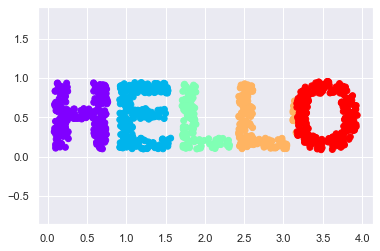

In [69]:
X = make_hello(1000)
print("ddd", X.shape)
colorize = dict(c = X[:, 0], cmap = plt.cm.get_cmap("rainbow", 5))

plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis("equal")

(1000, 2)
<class 'list'>


(4.597858810380142, 8.755757454950324, 5.020644928025307, 7.258448710811383)

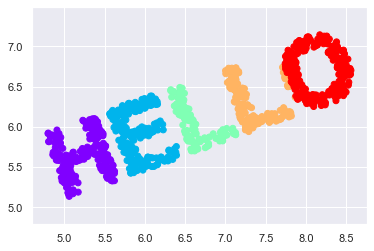

In [21]:
import numpy as np
print(X.shape)
def rotate(X, angle): # angle: degree
    theta = np.deg2rad(angle) # radian: 호의 길이
    R = [[np.cos(theta), np.sin(theta)], # 2차원 행렬 회전
        [-np.sin(theta), np.cos(theta)]]
    print(type(R))
    return np.dot(X, R)                  # 1000X2 * 2X2 => 1000X2
X2 = rotate(X, 20) + 5                   # 20도 회전
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis("equal")

(1000, 1000)


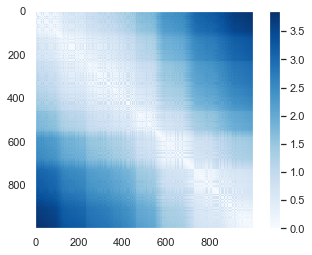

In [24]:
# 각 점들간의 상호거리(Euclidian Distance)
from sklearn.metrics import pairwise_distances # (default:유클리디안)
D = pairwise_distances(X) # 거리행렬
print(D.shape)
D[:5, :5]

plt.imshow(D, zorder = 2, cmap = "Blues", interpolation = "nearest")
plt.colorbar()

In [26]:
D2 = pairwise_distances(X2)
np.allclose(D, D2) # 회전은 했지만 원형을 유지하고 있다.

True

[[-0.74494191 -1.70588632]
 [-0.41295504 -1.81002158]
 [-0.73486201 -1.70435097]
 ...
 [ 0.75145058  1.84680917]
 [ 0.4906357   1.9307466 ]
 [ 0.63071876  1.89955864]]


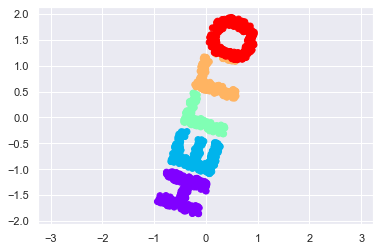

In [28]:
# manifold : 다형체 -> 차원을 축소하더라도 모양은 비슷하다.
from sklearn.manifold import MDS

# 미리 계산된 거리행렬을 이용하여 차원을 축소한다.
# dissimilarity='precomputed' : 미리 계산되어진 거리행렬이 필요하다.
model = MDS(n_components = 2, dissimilarity = "precomputed", random_state = 1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis("equal")
print(out)

In [34]:
# 고윳값 분해
import numpy as np
rng = np.random.RandomState(10) # seed값
C = rng.randn(3, 3)
print(np.dot(C, C.T)) # 행렬의 거듭제곱 => 정방행렬이면서 대칭행렬

e, V = np.linalg.eigh(np.dot(C, C.T)) # eigh : 고윳값 분해
print("\neigenvector\n", V) # 고유벡터
print("\neigenvalue\n", e)  # 고윳값

np.dot(V[1], V[2]) # 두 벡터의 내적 => 0에 가까우므로 직교 => 고유벡터는 정직교한다.

[[4.67300869 1.54608517 0.42456214]
 [1.54608517 0.9046519  0.0621289 ]
 [0.42456214 0.0621289  0.0822976 ]]

eigenvector
 [[-0.15797077 -0.30570231 -0.93893095]
 [ 0.20981122  0.9187662  -0.33443672]
 [ 0.9648961  -0.24982947 -0.08099843]]

eigenvalue
 [0.02629875 0.37332691 5.26033253]


-3.122502256758253e-17

In [42]:
# 2차원 -> 3차원으로 변환
def random_projection(X, dimension = 3, rseed = 42):
    assert dimension >= X.shape[1] # X.shape[1]: 행,열(2차원) -> 차원확대만 가능
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension) # 3 X 3
    print("C는", C.shape)
    print(np.dot(C, C.T)) # 행렬의 거듭제곱 - 정방행렬&대칭행렬
    e,V = np.linalg.eigh(np.dot(C, C.T)) # 고윳값, 고유벡터
    print("V는", V.shape) # 3 X 3
    print("차원은", V[:X.shape[1]]) # 2차원
    return np.dot(X, V[:X.shape[1]]) # 3 X 2
print(X.shape)
print(X.shape[1])
print("데이터의 차원은", X.shape)
X3 = random_projection(X, 3)
X3.shape # 1000 X 3

(1000, 2)
2
데이터의 차원은 (1000, 2)
C는 (3, 3)
[[0.68534241 0.63723771 0.37423535]
 [0.63723771 2.42926786 2.33541214]
 [0.37423535 2.33541214 3.30327538]]
V는 (3, 3)
차원은 [[-0.63360361  0.75939282  0.14788172]
 [ 0.64803399  0.41652241  0.63762139]]
(1000, 2)


(1000, 3)

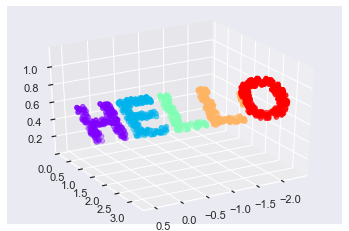

In [49]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection = "3d")
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2], **colorize)
ax.view_init(azim = 60, elev = 30) # view_init:3차원에서의 카메라각도, azim:좌우(도), elev:상하(도)

(-1.0390064107727603,
 1.03771339899632,
 -2.0646660054511305,
 2.1354582444849126)

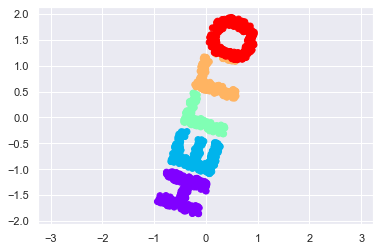

In [52]:
model = MDS(n_components = 2, random_state = 1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis("equal")

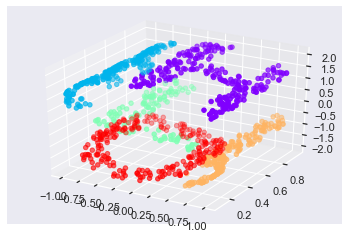

In [57]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1) # sign:부호(+,-)
    return np.vstack((x,y,z)).T

XS = make_hello_s_curve(X)
ax = plt.axes(projection = "3d")
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2], **colorize)

# MDS는 선형에는 강하지만 비선형에는 취약하다.

(-1.322639384960314,
 1.1799486556119982,
 -2.1918230064186095,
 2.3891359457585004)

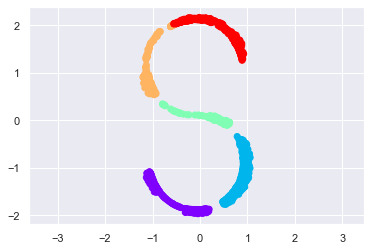

In [59]:
# MDS는 비선형에서 모양 유지가 안된다.
model = MDS(n_components = 2, random_state = 1)
out3 = model.fit_transform(XS)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis("equal")

(0.15, -0.15)

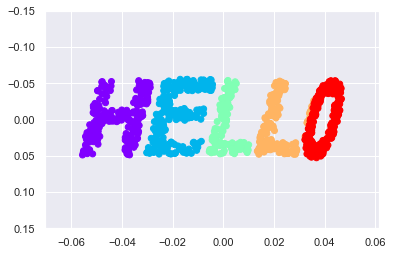

In [61]:
# MDS는 비선형에서 모양 유지가 안된다.
# => LLE(Locally Linear Embedding) - 비선형에 강하다.
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors = 100, n_components = 2, method = "modified",
                              eigen_solver = "dense")
out = model.fit_transform(XS)
fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15)

C:\Users\ICT01_24\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_24\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_24\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_24\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_24\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_24\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 5089

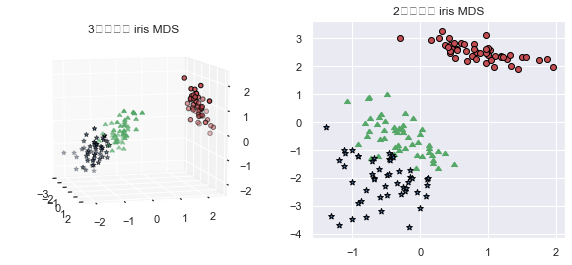

In [75]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn import manifold
from matplotlib import pylab
from sklearn.manifold import MDS
from mpl_toolkits import mplot3d
import os
CHART_DIR = "./"
colors = ["r", "g", "b"]
markers = ["o", 6, "*"]
def plot_iris_mds():
    iris = load_iris()
    X = iris.data
    y = iris.target
    fig = pylab.figure(figsize=(10, 4))
    ax = fig.add_subplot(121, projection='3d')
    ax.set_facecolor('white')
    mds = manifold.MDS(n_components=3)
    Xtrans = mds.fit_transform(X)
    for cl, color, marker in zip(np.unique(y), colors, markers):
        ax.scatter(
            Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], Xtrans[y == cl][:, 2], c=color, marker=marker, edgecolor='black')
    pylab.title("3차원에서 iris MDS")
    ax.view_init(10, -15) # 카메라각도 조절

    mds = manifold.MDS(n_components=2)
    Xtrans = mds.fit_transform(X)

    ax = fig.add_subplot(122)
    for cl, color, marker in zip(np.unique(y), colors, markers):
        ax.scatter(
            Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], c=color, marker=marker, edgecolor='black')
    pylab.title("2차원에서 iris MDS")

    filename = "mds_demo_iris.png"
    pylab.savefig(os.path.join(CHART_DIR, filename), bbox_inches="tight")

plot_iris_mds()

In [76]:
# Kmeans : 군집분석 => 종속변수 결정,
#  - 압축 : 팔레트, 실제데이터 : 팔레트 번호(256) 1byte로 표현가능 ex) jpg
#  - 원형이상치 제거
#  - 미리 군집화해서 문제해결에 도움을 준다. ex) 챗봇
#
# <<실제 kmeans의 알고리즘>>
#  - K값(군집수)과 중심값을 결정 -> 계속해서 중심값 재계산(중심점 변화)
#  - kmeans의 문제점: 이상치에 민감하다.
#  - kmeans의 척도 : 거리값(피타고라스의 정리 - euclidian distance)
# - DBSCAN : eps(기본거리값), 군집이 되기 위한 최소요소수로 근거리에 의한 군집, 
#          : 이웃 간의 거리(kmeans는 중심과의 거리)
#          : 특이한 경우 사용
#   - 핵심값, 경계값, 어느 군집에도 속하지 않는 값

In [79]:
import scipy
import sklearn.metrics.pairwise

a_64 = np.array([61.22, 71.60, -65.755], dtype = np.float64)
b_64 = np.array([61.22, 71.608, -65.72], dtype = np.float64)
a_32 = a_64.astype(np.float32)
b_32 = b_64.astype(np.float32)

# norm : 원점으로부터의 크기(단일)
dist_64_np = np.array([np.linalg.norm(a_64 - b_64)], dtype = np.float64)
dist_32_np = np.array([np.linalg.norm(a_32 - b_32)], dtype = np.float32)

# euclidian distance
# metric='manhattan' : 수평,수직으로만 잰 거리
dist_64_sklearn = sklearn.metrics.pairwise_distances([a_64], [b_32], metric="manhattan")

from sklearn.metrics.pairwise import euclidean_distances

In [82]:
from sklearn.svm import SVC # SVC : 분류
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Kmeans, PCA는 전처리에 민감하다.
# -> 전처리를 안하면 사이즈가 큰 애가 중요한 변수가 되어버림
#     => 반드시 스케일링이 필요하다.
from sklearn.preprocessing import MinMaxScaler
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
svm = SVC()
svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
print("테스트 점수 : {:.2f}".format(svm.score(X_test_scaled, y_test)))

테스트 점수 : 0.95


C:\Users\ICT01_24\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [84]:
# GridSearchCV 사용
from sklearn.model_selection import GridSearchCV
param_grid = {"C" : [0.001, 0.01, 0.1, 1, 10, 100],
             "gamma" : [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid = param_grid, cv = 5)
grid.fit(X_train_scaled, y_train)
print("최상의 교차 검증 정확도 : {:.2f}".format(grid.best_score_))
print("테스트 점수 : {:.2f}".format(grid.score(X_test_scaled, y_test)))
print("최적의 매개변수 : ", grid.best_params_)

최상의 교차 검증 정확도 : 0.98
테스트 점수 : 0.97
최적의 매개변수 :  {'C': 1, 'gamma': 1}


In [88]:
from sklearn.pipeline import Pipeline
# 참조 : 파라미터 전달
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
pipe.fit(X_train, y_train)
print("테스트 점수: {:.2f}".format(pipe.score(X_test, y_test)))

테스트 점수: 0.95


C:\Users\ICT01_24\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [92]:
# GridSearchCV + Pipeline 사용 -> 다양한 테스트 문제 해결
# Regularization(규제) : 과적합
from sklearn.model_selection import GridSearchCV
param_grid = {"svm__C" : [0.001, 0.01, 0.1, 1, 10, 100], # 처음에는 대충, 수치 늘려가면서
              "svm__gamma" : [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid = param_grid, cv = 5)
grid.fit(X_train_scaled, y_train)
print("최상의 교차 검증 정확도 : {:.2f}".format(grid.best_score_))
print("테스트 점수 : {:.2f}".format(grid.score(X_test_scaled, y_test)))
print("최적의 매개변수 : ", grid.best_params_)

최상의 교차 검증 정확도 : 0.98
테스트 점수 : 0.97
최적의 매개변수 :  {'svm__C': 1, 'svm__gamma': 1}


array([[6.85348837, 3.1       ],
       [5.1875    , 3.6375    ],
       [5.90980392, 2.73529412],
       [4.76666667, 2.89166667]])

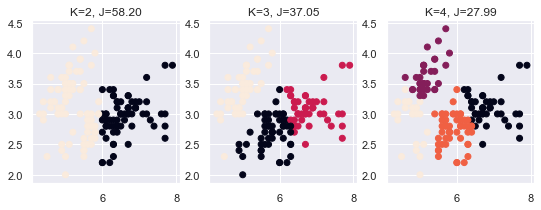

In [96]:
# 초기 중심값 결정 입력 -> 중심값은 계속 변화한다.
# 중심값과의 거리값이 중요하다.
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
iris = datasets.load_iris()
X = iris.data[:, :2] # iris의 전체 변수는 4개이고, 그 중 2개를 사용한다.
y_iris = iris.target
km2 = cluster.KMeans(n_clusters = 2).fit(X)
km3 = cluster.KMeans(n_clusters = 3).fit(X)
km4 = cluster.KMeans(n_clusters = 4).fit(X)

plt.figure(figsize=(9,3))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c = km2.labels_) # labels_ : 군집번호
plt.title("K=2, J=%.2f" % km2.inertia_) # 군집 내부 거리값
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c = km3.labels_)
plt.title("K=3, J=%.2f" % km3.inertia_)
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c = km4.labels_)
plt.title("K=4, J=%.2f" % km4.inertia_)

km4.cluster_centers_ # km4의 중심값(4개)

[[7 5]
 [5 7]
 [7 7]
 [4 4]
 [4 6]
 [1 4]
 [0 0]
 [2 2]
 [8 7]
 [6 8]
 [5 5]
 [3 7]]


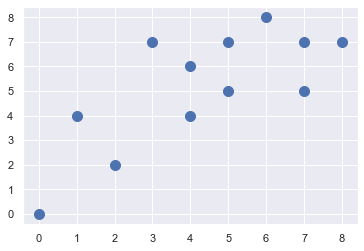

In [99]:
X = np.array([[7,5], [5,7], [7,7], [4,4], [4,6], [1,4], 
              [0,0], [2,2], [8,7], [6,8], [5,5], [3,7]])
print(X)
plt.scatter(X[:,0], X[:,1], s = 100)
plt.show()

12


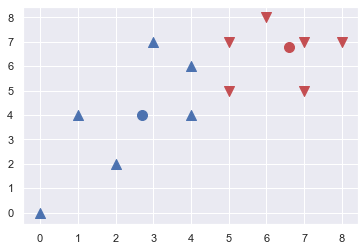

In [113]:
from sklearn.cluster import KMeans
# 군집번호 - 종속변수(레이블은 12개)
model = KMeans(n_clusters = 2, init = "random", n_init = 1, max_iter = 1, random_state = 1).fit(X)
c0, c1 = model.cluster_centers_
c0, c1
print(len(model.labels_))

# boolean indexing
plt.scatter(X[model.labels_==0,0], X[model.labels_==0,1], s = 100, marker = "v", c = "r")
plt.scatter(X[model.labels_==1,0], X[model.labels_==1,1], s = 100, marker = "^", c = "b")
plt.scatter(c0[0], c0[1], s = 100, c = "r")
plt.scatter(c1[0], c1[1], s = 100, c = "b")
plt.show()

In [116]:
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

In [129]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family = font_name)

In [201]:
n_colors = 64
china = load_sample_image("flower.jpg") # color는 RGB

# 컬러값 정규화(0-1의 값으로 정규화)
china = np.array(china, dtype = np.float64) / 255

In [203]:
w, h, d = original_shape = tuple(china.shape) # 이미지크기 행(w)X열(h), 컬러값(d)
print(w, h, d) # 427 * 640, 3

assert d == 3 # RGB만 들어와라
image_array = np.reshape(china, (w * h, d)) # 계산하기 쉽게 하기 위하여 2차원으로 변환(행*열, 컬러값)

427 640 3


In [205]:
image_array_sample = shuffle(image_array, random_state = 0)[:1000] # 1000개의 행

# 64개의 컬러로 군집화
kmeans = KMeans(n_clusters = n_colors, random_state = 0).fit(image_array_sample)

In [207]:
# 64개의 중심값으로 이미지 전체를 예측
labels = kmeans.predict(image_array)

In [209]:
def recreate_image(codebook, labels, w, h): # codebook:64개의 컬러값, labels:이미지픽셀수
    d = codebook.shape[1] # 64개의 중심값   64 X 3(RGB)
    image = np.zeros((w, h, d)) # 원래 이미지 크기
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

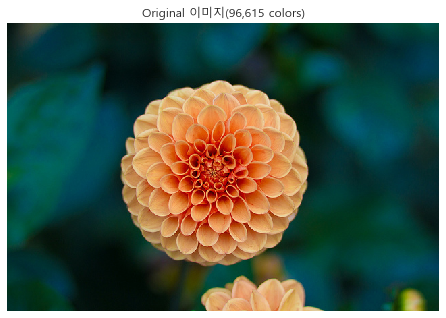

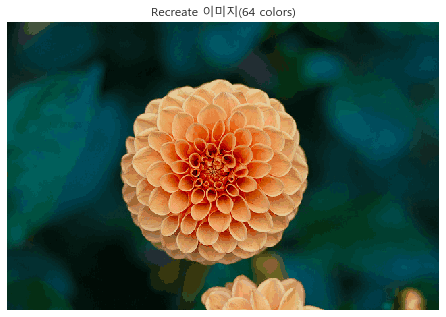

In [211]:
# 원본 이미지
plt.figure(1)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis("off")
plt.title("Original 이미지(96,615 colors)")
plt.imshow(china)

# 새로 생성한 이미지
plt.figure(2)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis("off")
plt.title("Recreate 이미지(64 colors)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

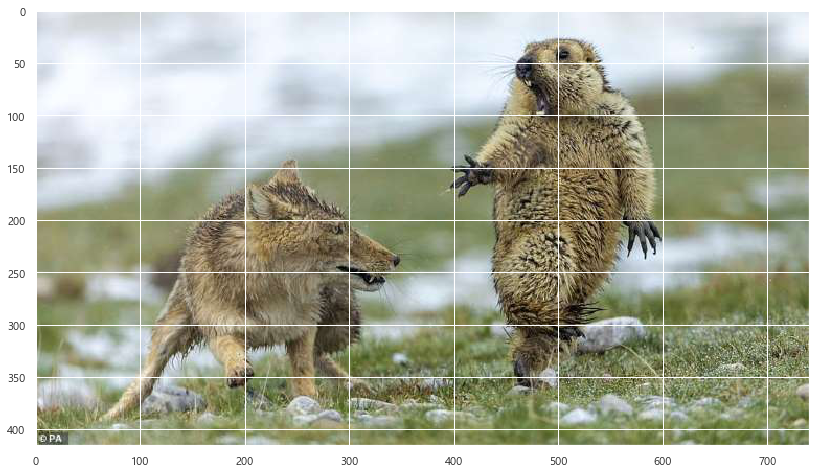

In [213]:
image = plt.imread("animal.jpg")
plt.figure(figsize = (15,8))
plt.imshow(image)

In [215]:
image.shape

(416, 740, 3)

In [217]:
# 전체 이미지 바이트 수
image.shape[0] * image.shape[1] * image.shape[2]

923520

In [219]:
x, y, z = image.shape
image = np.array(image, dtype = np.float64) / 255
image_2d = image.reshape(x * y, z) # kmeans는 3차원을 이해하지 못하므로 reshape
image_2d.shape

(307840, 3)

In [229]:
kmeans_cluster = cluster.KMeans(n_clusters = 64)
kmeans_cluster.fit(image_2d)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_centers

array([[1.82613876e-03, 1.96256989e-03, 1.18009172e-03],
       [3.23740576e-03, 3.38158452e-03, 3.52812447e-03],
       [2.09899372e-03, 2.21831563e-03, 2.06971490e-03],
       [8.85029783e-04, 7.18082239e-04, 3.41201002e-04],
       [3.11907128e-03, 3.07364740e-03, 2.67170849e-03],
       [1.52445625e-03, 1.31125060e-03, 8.61633844e-04],
       [3.67626978e-03, 3.76170131e-03, 3.89084963e-03],
       [2.02243074e-03, 2.15852848e-03, 1.58914934e-03],
       [2.55424234e-03, 2.70640402e-03, 2.61481632e-03],
       [2.57286984e-03, 2.34381992e-03, 1.79726630e-03],
       [2.90474090e-03, 3.06244468e-03, 3.13841886e-03],
       [1.85231506e-03, 1.61979474e-03, 1.11975064e-03],
       [1.99688207e-03, 1.85987632e-03, 1.49100796e-03],
       [2.32438889e-03, 2.47950411e-03, 2.24734686e-03],
       [3.42259192e-03, 3.55912099e-03, 3.71215083e-03],
       [2.67370196e-03, 2.83018152e-03, 2.80335336e-03],
       [2.57555505e-03, 2.64023752e-03, 2.21804527e-03],
       [2.33322507e-03, 2.40960

In [230]:
len(cluster_centers)

64

In [231]:
cluster_centers.shape

(64, 3)

In [232]:
cluster_labels = kmeans_cluster.labels_
cluster_labels

array([ 1,  1,  1, ..., 44, 47, 47])

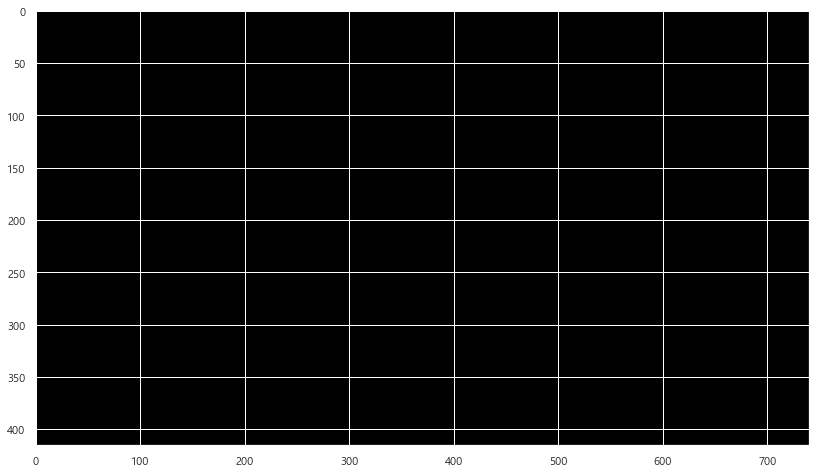

In [234]:
plt.figure(figsize = (15,8))
plt.imshow(cluster_centers[cluster_labels].reshape(x, y, z))

In [237]:
# 원형 이상치 제거
from sklearn.datasets import make_blobs
X, label = make_blobs(100, centers = 1)

In [239]:
kmeans = KMeans(n_clusters = 1)
kmeans.fit(X)
distances = kmeans.transform(X)
sorted_idx = np.argsort(distances.ravel())[::-1][:5]

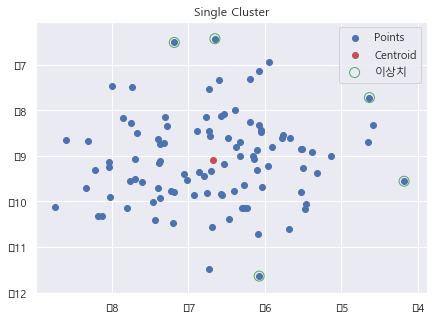

In [242]:
f, ax = plt.subplots(figsize = (7,5))
ax.set_title("Single Cluster")
ax.scatter(X[:, 0], X[:, 1], label = "Points")
ax.scatter(kmeans.cluster_centers_[:, 0],
          kmeans.cluster_centers_[:, 1],
          label = "Centroid", color = "r")
ax.scatter(X[sorted_idx][:, 0],
          X[sorted_idx][:, 1],
          label = "이상치", color = "g", facecolors = "none", s = 100)
ax.legend(loc = "best")

In [246]:
# PCA(Principle Component Anaysis)
# 모델 입력 전 단계에서 특징 추출(noise 제거)
# PCA의 결과를 모델의 변수로 추가하면 정확도 상승
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2],
             [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components = 2) # 주성분 2개
pca.fit(X)
print(pca.explained_variance_ratio_) # 설명력

# 차원 축소 후에 분석을 하면 좋은 점
#  - noise 제거
#  - 속도 개선
#  - 차원의 저주 => 복잡한 문제를 해결
print(pca.explained_variance_) # 분산이 큰 것이 주성분
print(pca.noise_variance_)

[0.99244289 0.00755711]
[7.93954312 0.06045688]
0.0


In [247]:
# svd 희소행렬 특징추출, 비정방행렬인 경우 사용
# 500 X 500
pca = PCA(n_components = 2, svd_solver = "full") # randomized, arpack
# singular value decomposition
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.99244289 0.00755711]


In [259]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
print(cancer.feature_names)
print(type(cancer))
X_train , X_test, y_train , y_test = train_test_split(
cancer.data, cancer.target, random_state=1)
print(type(X_train))
print(X_train.shape)
print(X_train.dtype)
print(X_train.shape) 

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
(426, 30)
float64
(426, 30)


In [260]:
from sklearn.svm import SVC
svm = SVC(C = 100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도 : {:.2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도 : 0.62


C:\Users\ICT01_24\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [262]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [264]:
svm.fit(X_train_scaled, y_train)
print("스케일 조정된 테스트 세트의 정확도 : {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도 : 0.97


C:\Users\ICT01_24\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [266]:
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

[0.44272026 0.18971182]
원본 데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 2)


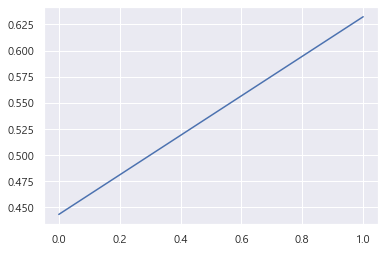

In [269]:
pca = PCA(n_components = 2)
pca.fit(X_scaled)
# 2개의 주성분 출력
X_pca = pca.transform(X_scaled)
print(pca.explained_variance_ratio_)
# 569, 30, 28개의 특성을 제거
print("원본 데이터 형태 : {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태 : {}".format(str(X_pca.shape)))

plt.plot(np.cumsum(pca.explained_variance_ratio_)) # elbow를 시각적으로 확인

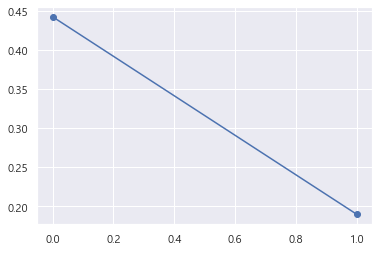

In [272]:
plt.plot(pca.explained_variance_ratio_, "bo-")

In [280]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # 정규화
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.decomposition import PCA
pca = PCA(n_components = 6) # 전체 변수 30개
pca.fit(X_train_scaled)
X_t_train = pca.transform(X_train_scaled)
X_t_test = pca.transform(X_test_scaled)
svm.fit(X_t_train, y_train)
print("SVM 테스트 정확도 : {:.2f}".format(svm.score(X_t_test, y_test)))

# 변수 개수별(n_components) 테스트 정확도
# 6 : 92%
# 9 : 94%
# 15 : 94%
# 20 : 95%
# 30 : 97%

SVM 테스트 정확도 : 0.92


C:\Users\ICT01_24\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [282]:
print("PCA 주성분 형태 {}".format(pca.components_.shape))
# 6, 30

PCA 주성분 형태 (6, 30)


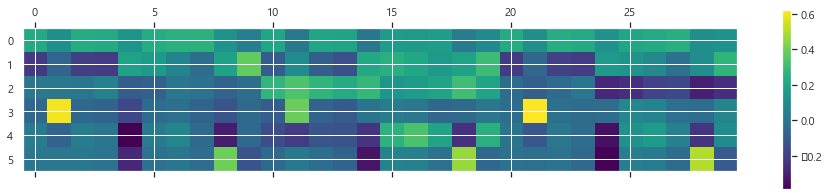

In [284]:
plt.matshow(pca.components_, cmap = "viridis")
plt.colorbar()

(87, 65)


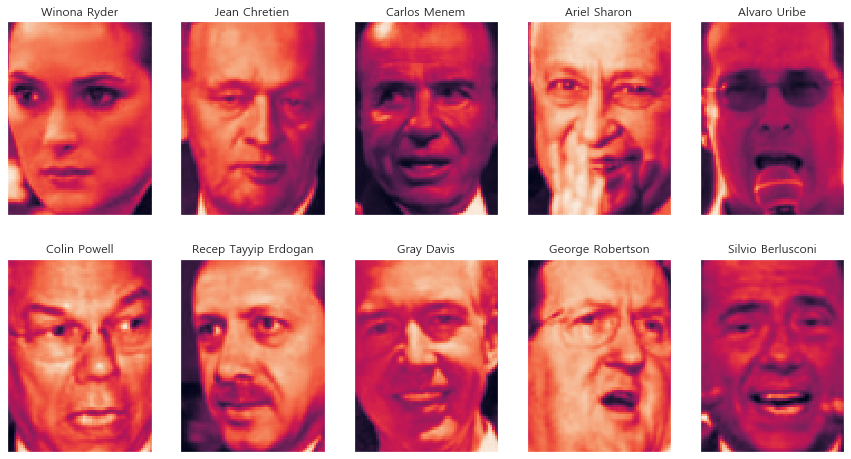

In [298]:
%matplotlib inline
from sklearn.datasets import fetch_lfw_people # 사람 얼굴 다운로드 제공
import matplotlib.pyplot as plt
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7) # 20장의 사진
image_shape = people.images[0].shape
print(image_shape) # 87 * 65(이미지 가로 * 세로)
fig, axes = plt.subplots(2, 5, figsize = (15, 8),
                        subplot_kw = {"xticks" : (), "yticks" : ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()): # ravel: 차원수 일치를 위해
    ax.imshow(image)
    ax.set_title(people.target_names[target])


In [299]:
print("이미지 사이즈 : {}".format(people.images.shape))
print("클래스 개수 : {}".format(len(people.target_names)))

이미지 사이즈 : (3023, 87, 65)
클래스 개수 : 62


In [301]:
mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target) :
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people/255. 

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state = 0)

In [305]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 100, whiten = True, random_state = 0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

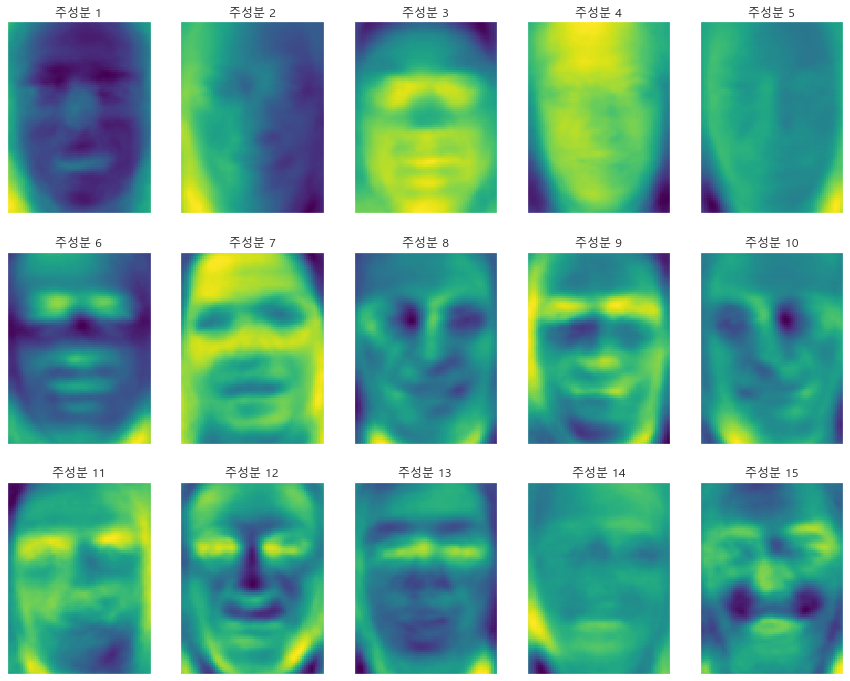

In [306]:
fig, axes = plt.subplots(3, 5, figsize = (15, 12),
                        subplot_kw = {"xticks" : (), "yticks" : ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap = "viridis")
    ax.set_title("주성분 {}".format((i+1)))

In [ ]:
# 컴퓨터가 주성분 분석을 통해 찾아낸 주성분
#  - 100개를 합하여 출력 원본이미지를 복원함 => ANN의 가중치 특징도